In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import spacy
from haversine import haversine, Unit

###### Importing the pandas library to work with data
###### Importing the pyplot module from the matplotlib library to create graphs and visualizations
###### Importing the TextBlob class from the textblob library, which allows you to perform text analysis, including tonality analysis
###### Importing the spacy: An NLP (Natural Language Processing) library used for text processing and extraction of aspects from the reviews.
###### Importing the haversine class from the haversine library
###### p.s haversine library is a package that calculates the distance between two geographical points on the Earth's surface, given their latitude and longitude.   Unit: This is an enumeration that specifies the unit of measurement for the distance(kilometers, miles).

In [62]:
chunk_size = 10000
dataset = pd.read_csv('Section 1 data.csv', chunksize=chunk_size)

###### There is a lot of data in our set(Section 1 data.csv), we need to import some of it, so we will use "_chunk_"

In [63]:
dataframes = []

for i in dataset:
    dataframes.append(i)

full_dataset = pd.concat(dataframes, ignore_index=True)

###### Creating an empty list of data frames and we will add each data chunk.
###### In cycle "_for_" each chunk is added to the data frames
###### After we unite all data into one large.

### 
> ## №1 

In [64]:
unique_restaurants = set()

for i in dataframes:
    restaurants_chunk = i[i['Business_Category'] == "Restaurants"]
    unique_restaurants.update(restaurants_chunk['Business_ID'].unique())
    
count_unique_restaurants = len(unique_restaurants)

print("1. How many unique restaurants could be found in this data set? ")
print("Answer: ", count_unique_restaurants)

1. How many unique restaurants could be found in this data set? 
Answer:  594


###### A "set" is created and in the cycle we fill it and after we move to a new chunk, we call the "update()" method and the "unique()" method.

###### So "unique_restaurants" stores all unique values that can find out the number of restaurants
##### And just find the length of "unique_restaurants" and output

### 
> ## №2

In [65]:
setOfRestaurants = full_dataset[full_dataset['Business_Category'] == "Restaurants"]
setOfRestaurants_and_ID = setOfRestaurants[["Business_ID", "Review_Text"]]

reviews_count = setOfRestaurants_and_ID['Business_ID'].value_counts()

highest_reviews_restaurant = reviews_count.idxmax()
highest_reviews_count = reviews_count.max()
total_reviews = reviews_count.sum()

percentage_highest_reviews = (highest_reviews_count / total_reviews) * 100

nameOfRestaurant_by_ID = setOfRestaurants.loc[setOfRestaurants_and_ID["Business_ID"] == highest_reviews_restaurant, "Business_Name"].iloc[0]

print("2. Which restaurant received the highest number of reviews?")
print("Restaurant:",nameOfRestaurant_by_ID)
print("Number of reviews:", highest_reviews_count)
print("Percentage: {:.2f}%".format(percentage_highest_reviews))

2. Which restaurant received the highest number of reviews?
Restaurant: LAVO Italian Restaurant & Lounge
Number of reviews: 201
Percentage: 3.09%


######  we need restaurants, we create a DataFrame with restaurants only, after using it, we create another DataFrame in which the "Business_ID" and "Review_Text" of these restaurants are.

###### After using these methods, we find its name in "Business_Name" by the ID of the restaurant that scored the most reviews
###### p.s. we did not add the column "Business_Name" to the DataFrame "setOfRestaurants_and_ID" because we did not change it, but simply found the name of the restaurant by ID, but we can also add it 
###
##### Next, the percentage is calculated and all the results are displayed
####
####
> ## №3


In [66]:
dataset_Nivada = full_dataset[full_dataset["State"] == "NV"]
five_star = dataset_Nivada[dataset_Nivada["Avg_Business_Star_Rating"] == 5]
star_rating_city = five_star["City"].unique()

print("3. Which cities have got at least one 5-star review in Nevada (NV) state?")
print("Answer: ",star_rating_city)

3. Which cities have got at least one 5-star review in Nevada (NV) state?
Answer:  ['Las Vegas' 'Henderson' 'Boulder City' 'Nellis']


###### Create a Data frame associated only with the state of Nevada, then use it to create another Dataframe where there is at least one 5-star review
###### Array is created where all cities without repetition in the state of Nevada with at least one 5-year review are stored
##### Next, just output them
###
###

> ## №4

In [67]:
dataset_hotels_travel = full_dataset[full_dataset['Business_Category'] == "Hotels & Travel"]
dataset_city_review = dataset_hotels_travel[["Business_ID","City", "Review_Text"]]
reviews_count_in_city = dataset_city_review["Business_ID"].value_counts()
highest_reviews_city_id = reviews_count_in_city.idxmax()
highest_reviews_city = dataset_city_review.loc[dataset_city_review["Business_ID"] == highest_reviews_city_id, "City"].iloc[0]

highest_reviews_count = reviews_count_in_city[highest_reviews_city_id]
total_reviews_count = dataset_city_review.shape[0]
percentage_highest_city = (highest_reviews_count / total_reviews_count) * 100

print("4. Which city has the highest number of reviews in the Business Category of “Hotels & Travel”? What about percentage-wise?  ")
print("Answer: ",highest_reviews_city)
print("Percentage {:.2f}%".format(percentage_highest_city))

4. Which city has the highest number of reviews in the Business Category of “Hotels & Travel”? What about percentage-wise?  
Answer:  Las Vegas
Percentage 3.58%


###### In this part of the code, we create a DataFrame from the category that we need ("Hotels & Travel"), then from this dataset we create another one to find the city with the largest number of reviews and the percentage of the number of reviews of this city to the total number of all reviews
###### After we have counted the number of reviews in each city by city ID, we find the ID with the most reviews, using it we find the city
###### Method.iloc[0] selects the first row from the set to get a single value (the name of the city), rather than a whole series of rows with the same cities.
###### Now, to find out the number of reviews in this city, create an object in the "Series" format that returns the number of reviews using the ID
###### shape is a DataFrame attribute that returns the size of the table as a tuple (number of rows, number of columns),shape[0] returns the number of rows in our dataframe "dataset_city_review". This gives us the total number of reviews in the "Hotels & Travel" category.
###### Calculate the percentage-wise
##### And output our results 
###
###

> ## №5

In [68]:
datase_userID_date_review = full_dataset[['User_ID', 'Review_Date', 'Review_Text']].copy()
datase_userID_date_review['Review_Date'] = pd.to_datetime(datase_userID_date_review['Review_Date'])

datase_userID_date_review['Day_of_Week'] = datase_userID_date_review['Review_Date'].dt.day_name()
reviews_by_day = datase_userID_date_review['Day_of_Week'].value_counts()
most_likely_day = reviews_by_day.idxmax()

print("5. At what day of the week people are more likely to post their reviews?")
print("Answer: ", most_likely_day)

5. At what day of the week people are more likely to post their reviews?
Answer:  Monday


###### We aim to determine which day of the week users are most likely to post their reviews. To achieve this, we use the full_dataset DataFrame and follow these steps:
###### We create a new DataFrame dataset "userID_date_review" containing only three columns: User_ID, Review_Date, and Review_Text
###### We use the "copy()" method to avoid the "SettingWithCopyWarning". This ensures that we are working with a full copy of the original DataFrame.
###### Next, we convert the "Review_Date" column to datetime format, which makes it easier to work with dates and extract information like the day of the week.
##### After identifying the day of the week with the most reviews, we print the result.
###
###

> ## №6

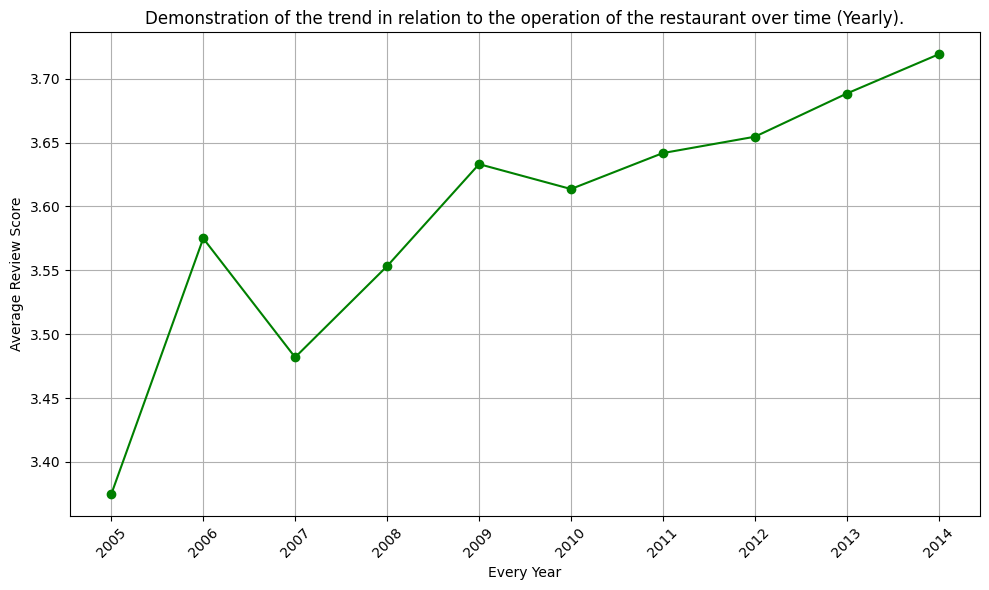

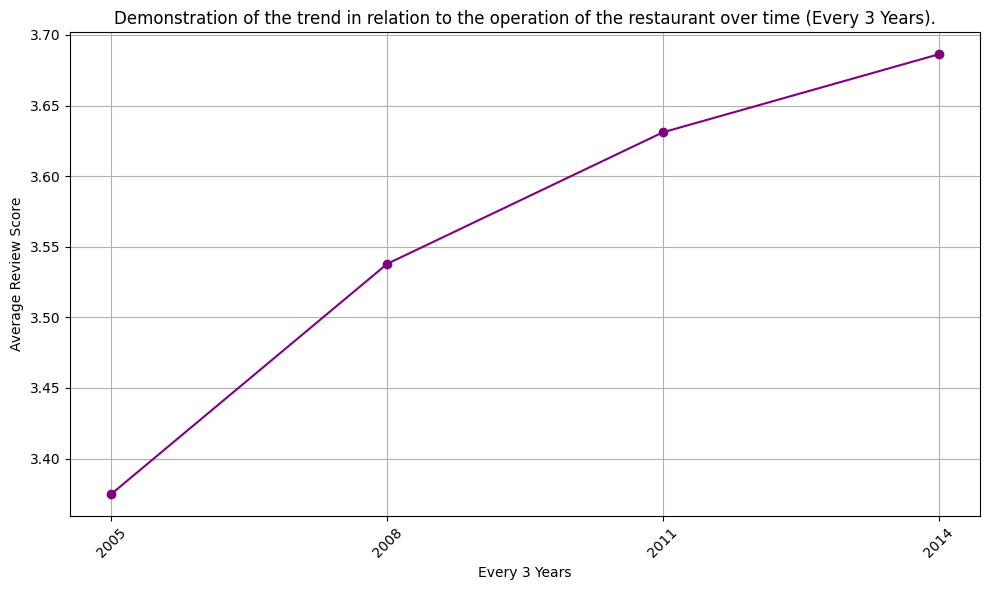

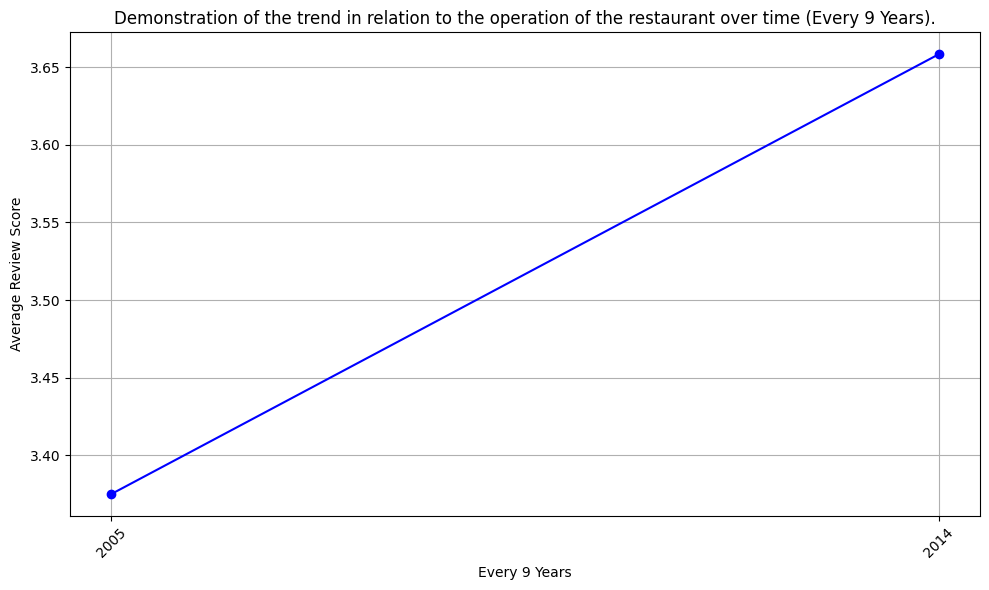

6. Showcase if there are any trends regarding restaurant performance as time goes by.
Based on the graph that shows yearly trends, we can say that the trend is uptrend in 2005 -2006, 2007 - 2008, 2008 -2009,2012 - 2013,2013 - 2014 and 2006 -2007 are downtrend

Based on the graph that shows trends every 3 years, we can say that the trend is uptrend in 2005 -2008, 2008 - 2011, 2011 - 2014 and it does not downtrend

Based on the graph that shows trends 9 years, we can say that the trend is uptrend in 2005 - 2014 


In [69]:
setOfRestaurants = full_dataset[full_dataset['Business_Category'] == "Restaurants"].copy()
sefOfDateReview = setOfRestaurants[['Review_Date', 'Avg_Business_Star_Rating']].copy()
sefOfDateReview['Review_Date'] = pd.to_datetime(sefOfDateReview['Review_Date'])
sefOfDateReview['Avg_Business_Star_Rating'] = sefOfDateReview['Avg_Business_Star_Rating'].astype(float)
sefOfDateReview.set_index('Review_Date', inplace=True)

yearly_reviews = sefOfDateReview.resample('YE')['Avg_Business_Star_Rating'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_reviews, marker='o', color='green')
plt.title('Demonstration of the trend in relation to the operation of the restaurant over time (Yearly).')
plt.xlabel('Every Year')
plt.ylabel('Average Review Score')
plt.grid(True)

plt.xticks(yearly_reviews.index, yearly_reviews.index.strftime('%Y'), rotation=45)
plt.tight_layout()
plt.show()

three_year_reviews = sefOfDateReview.resample('3YE')['Avg_Business_Star_Rating'].mean()

plt.figure(figsize=(10, 6))
plt.plot(three_year_reviews, marker='o', color='purple')
plt.title('Demonstration of the trend in relation to the operation of the restaurant over time (Every 3 Years).')
plt.xlabel('Every 3 Years')
plt.ylabel('Average Review Score')
plt.grid(True)

plt.xticks(three_year_reviews.index, three_year_reviews.index.strftime('%Y'), rotation=45)
plt.tight_layout()
plt.show()

nine_year_reviews = sefOfDateReview.resample('9YE')['Avg_Business_Star_Rating'].mean()

plt.figure(figsize=(10, 6))
plt.plot(nine_year_reviews, marker='o', color='blue')
plt.title('Demonstration of the trend in relation to the operation of the restaurant over time (Every 9 Years).')
plt.xlabel('Every 9 Years')
plt.ylabel('Average Review Score')
plt.grid(True)

plt.xticks(nine_year_reviews.index, nine_year_reviews.index.strftime('%Y'), rotation=45)
plt.tight_layout()
plt.show()
print("6. Showcase if there are any trends regarding restaurant performance as time goes by.")

print("Based on the graph that shows yearly trends, we can say that the trend is uptrend in 2005 -2006, 2007 - 2008, 2008 -2009,2012 - 2013,2013 - 2014 and 2006 -2007 are downtrend")
print()
print("Based on the graph that shows trends every 3 years, we can say that the trend is uptrend in 2005 -2008, 2008 - 2011, 2011 - 2014 and it does not downtrend")
print()
print("Based on the graph that shows trends 9 years, we can say that the trend is uptrend in 2005 - 2014 ")



###### 

###### From the full set of data, we select restaurants based on the column with the business category.
###### Creating a subset of data: Only two columns are selected from the filtered data: 'Review_Date'  and 'Avg_Business_Star_Rating' of the restaurant
###### The column with the dates of reviews is converted to the date and time format to work correctly with time series and then date column is then set as an index for ease of working with the data: 
```py
sefOfDateReview.loc[:, 'Review_Date'] = pd.to_datetime(sefOfDateReview['Review_Date'])
sefOfDateReview.set_index('Review_Date', inplace=True)
````
###### The data is resampled by different time intervals (yearly, every 3 years, and every 9 years), and the average restaurant rating is calculated for each period.
###### Plotting:
###### For each resampled dataset, we configure the graph parameters such as size, line styles, and markers for data points.
###### We add titles, axis labels, and grids for better readability of the graphs.
###### The labels on the X-axis (time axis) are formatted according to the chosen frequency:
###### For yearly and multi-year intervals, the labels are formatted to display only the year (%Y).
###### The graphs are output using the show() method, and the tight_layout() method is applied to adjust the placement of graph elements for better clarity.
#####
##### The graphs demonstrate the trend in the average restaurant rating over time:
######      The first graph shows the yearly trend.
######      The second graph shows the trend in 3-year intervals.
######      The third graph shows the trend in 9-year intervals, providing a longer-term view of rating changes.


##
##
> ## №7

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


C:\Users\Asus\Desktop\Section 1\.venv\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


1. Restaurant Maggiano's Little Italy should consider improving customer satisfaction based on negative feedback.
  Review: The service here is awful. It took us an hour to be sat. We never it bread, it felt like a very unca...
  Recommendations:
    - General improvement may be needed, as the feedback was negative.

  Review: I love the food here but this experience wasn't as great as it was in the past. I made a reservation...
  Recommendations:
    - General improvement may be needed, as the feedback was negative.

  Review: Went here today (22nd Aug) whilst in Vegas, we haven't left Vegas yet and I felt I needed to write a...
  Recommendations:
    - General improvement may be needed, as the feedback was negative.

  Review: Spur of the moment decision to eat at maggiano's food was good not great and service lacked in every...
  Recommendations:
    - Enhance customer service by training staff to be more attentive and responsive.

  Review: Atmosphere 4/5
Food is 2/5
Disappointing 

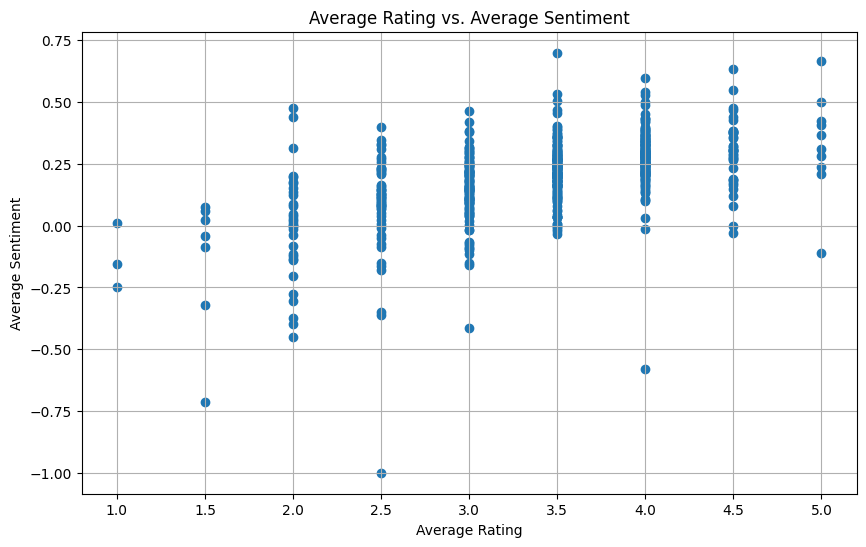

In [72]:
import spacy.cli 
spacy.cli.download("en_core_web_sm")  ## to download "en_core_web_sm"
nlp = spacy.load('en_core_web_sm')

def extract_aspects(review):
    doc = nlp(review)
    aspects = []
    
    for token in doc:
        if token.dep_ == 'nsubj' and token.head.pos_ == 'VERB':
            aspects.append(token.text.lower())
            
    return aspects

def generate_recommendations(review):
    aspects = extract_aspects(review)
    suggestions = []

    if 'food' in aspects or 'meal' in aspects:
        suggestions.append("- Improve the quality and consistency of food.")
    if 'service' in aspects or 'waiter' in aspects:
        suggestions.append("- Enhance customer service by training staff to be more attentive and responsive.")
    if 'environment' in aspects or 'ambience' in aspects:
        suggestions.append("- Create a more inviting and comfortable dining environment.")

    if not suggestions:
        suggestions.append("- General improvement may be needed, as the feedback was negative.")

    return suggestions

set_restaurant = full_dataset[full_dataset['Business_Category'] == "Restaurants"].copy()
dataOf_restaurant = set_restaurant[['Avg_Business_Star_Rating', 'Review_Text', 'Business_ID', 'Business_Name']].copy()

dataOf_restaurant.loc[:, 'sentiment'] = dataOf_restaurant['Review_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
average_rating = dataOf_restaurant.groupby('Business_ID')['Avg_Business_Star_Rating'].mean()
average_sentiment = dataOf_restaurant.groupby('Business_ID')['sentiment'].mean()

averageRating_and_averageSentiment = pd.DataFrame({
    'average_rating': average_rating,
    'average_sentiment': average_sentiment,
    'Business_Name': dataOf_restaurant.groupby('Business_ID')['Business_Name'].first()
}).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(averageRating_and_averageSentiment['average_rating'],
            averageRating_and_averageSentiment['average_sentiment'])
plt.title('Average Rating vs. Average Sentiment')
plt.xlabel('Average Rating')
plt.ylabel('Average Sentiment')
plt.grid(True)

suggestions = set()
count = 1

for index, row in averageRating_and_averageSentiment.iterrows():
    if row['average_sentiment'] < 0.5 and row['Business_Name'] not in suggestions:
        suggestions.add(row['Business_Name'])
        print(
            f"{count}. Restaurant {row['Business_Name']} should consider improving customer satisfaction based on negative feedback.")

        reviews_for_restaurant = dataOf_restaurant[dataOf_restaurant['Business_ID'] == row['Business_ID']]['Review_Text']
        negative_feedback_found = False

        for review in reviews_for_restaurant:
            if TextBlob(review).sentiment.polarity < 0:
                negative_feedback_found = True
                recommendations = generate_recommendations(review)
                print(f"  Review: {review[:100]}...")
                print("  Recommendations:")
                for rec in recommendations:
                    print(f"    {rec}")
                print()

        if not negative_feedback_found:
            print(
                "  General recommendation: Consider seeking feedback from customers to identify areas for improvement.")

        count += 1

plt.show()

###### nlp = spacy.load('en_core_web_sm'): Loads the small English model for spaCy to be used in processing text data
###### Function: extract_aspects(review)
###### Purpose:
###### Extracts key aspects from a given review using dependency parsing.

###### Parameters:
###### review (str): A textual review of a restaurant.
###### Returns:
###### aspects (list): A list of extracted aspects (nouns) relevant to the review.
###### Description:
###### The function tokenizes the review and checks each token's dependency. If a token is a subject of a verb, it is considered a relevant aspect and added to the list of aspects.
###### Function: generate_recommendations(review)
###### Purpose:
###### Generates recommendations based on the extracted aspects from a review.

###### Parameters:
###### review (str): A textual review of a restaurant.
###### Returns:
###### suggestions (list): A list of suggestions for improving restaurant services.
###### Description:
###### The function checks if specific aspects like "food," "service," or "environment" are mentioned in the review and appends relevant suggestions for improvement to the suggestions list. If no specific aspects are found, a general recommendation is added.
```py
dataOf_restaurant.loc[:, 'sentiment'] = dataOf_restaurant['Review_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
```
###### Calculates the sentiment polarity of each review using TextBlob and stores it in a new column called sentiment.
```py
average_rating = dataOf_restaurant.groupby('Business_ID')['Avg_Business_Star_Rating'].mean()
average_sentiment = dataOf_restaurant.groupby('Business_ID')['sentiment'].mean()
```
###### Groups the data by Business_ID and calculates the average star rating and average sentiment for each restaurant.

```py
averageRating_and_averageSentiment = pd.DataFrame({
    'average_rating': average_rating,
    'average_sentiment': average_sentiment,
    'Business_Name': dataOf_restaurant.groupby('Business_ID')['Business_Name'].first()
}).reset_index()
```

###### Constructs a new DataFrame that holds the average rating, average sentiment, and business name for each restaurant.

```py
plt.figure(figsize=(10, 6))
plt.scatter(averageRating_and_averageSentiment['average_rating'],
            averageRating_and_averageSentiment['average_sentiment'])
plt.title('Average Rating vs. Average Sentiment')
plt.xlabel('Average Rating')
plt.ylabel('Average Sentiment')
plt.grid(True)
```
###### Creates a scatter plot to visualize the relationship between average ratings and average sentiment of restaurants.


```py
suggestions = set()
count = 1

for index, row in averageRating_and_averageSentiment.iterrows():
    if row['average_sentiment'] < 0.5 and row['Business_Name'] not in suggestions:
        suggestions.add(row['Business_Name'])
        print(
            f"{count}. Restaurant {row['Business_Name']} should consider improving customer satisfaction based on negative feedback.")

        reviews_for_restaurant = dataOf_restaurant[dataOf_restaurant['Business_ID'] == row['Business_ID']]['Review_Text']
        negative_feedback_found = False

        for review in reviews_for_restaurant:
            if TextBlob(review).sentiment.polarity < 0:
                negative_feedback_found = True
                recommendations = generate_recommendations(review)
                print(f"  Review: {review[:100]}...")
                print("  Recommendations:")
                for rec in recommendations:
                    print(f"    {rec}")
                print()

        if not negative_feedback_found:
            print(
                "  General recommendation: Consider seeking feedback from customers to identify areas for improvement.")

        count += 1
```

###### Iterates through the average ratings and sentiments, identifying restaurants with average sentiment less than 0.5.
###### For each identified restaurant, it checks for negative reviews and generates recommendations. It outputs the restaurant name, a sample review, and the corresponding recommendations.
###### If no negative feedback is found, it suggests that the restaurant seeks customer feedback for improvement.

###### Displays the generated scatter plot 

##### This code provides an analytical approach to evaluating restaurant reviews by calculating average ratings and sentiment  and also provides tips that a restaurant can take to increase its attractiveness to the public.


##
##
> ## №8

In [71]:
data_of_userID_latitude_longitude = full_dataset[['User_ID', 'Latitude', 'Longitude']] 


def calculate_total_distance(user_df):
    total_distance = 0
    locations = list(zip(user_df['Latitude'], user_df['Longitude']))

    for i in range(len(locations) - 1):
        point1 = locations[i]
        point2 = locations[i + 1]
        total_distance += haversine(point1, point2, unit=Unit.KILOMETERS)

    return total_distance

user_distances = data_of_userID_latitude_longitude.groupby('User_ID', group_keys=False).apply(calculate_total_distance, include_groups=False).reset_index(name='Total_Distance')
max_distance_user = user_distances.loc[user_distances['Total_Distance'].idxmax()]

print("8. Bonus Question – Based on this data set which user had the highest cumulative travel distance? What distance has been covered by him/her?")
print(f"User with highest travel distance: {max_distance_user['User_ID']}")
print(f"Total distance covered: {max_distance_user['Total_Distance']} km")

8. Bonus Question – Based on this data set which user had the highest cumulative travel distance? What distance has been covered by him/her?
User with highest travel distance: WFpoTnMacPMtSmQTmJjp_Q
Total distance covered: 23827.55304767941 km


###### To find the maximum distance and to find the ID of this person, we need :
###### 'User_ID', 'Latitude', 'Longitude', so we create a Data Frame with this data
###### The functions
###### "calculate the total distance(user_df)":
###### "user_df": A data frame containing latitude and longitude data for a single user.
###### Returns the total distance traveled by the user in kilometers.
###### Iterates through the list of locations and calculates the distance between consecutive points using the "haversine" function, accumulating distances to get the final value.
###### The DataFrame "data_of_userID_latitude_longitude" is grouped by User_ID to process each user's data separately ( using the method "groupby()" ).
###### The "calculate_total_distance" function is applied to each userID to calculate their total travel distance 
###### The user with the highest travel distance is identified using "idxmax()" on the "Total_Distance" column.

##### And print the userID and total distance covered by the user with the highest travel distance
